In [1]:
using RCall
using CSV
using LowRankApprox

In [402]:
include("../code/julia/QPsubprob.jl");
include("../code/julia/ash.jl");

In [414]:
# include("../code/julia/makedata.jl");
L = Array{Float64,2}(CSV.read("../data/sample100000x100.txt", nullable = false, header = false, delim = ' '));

In [415]:
QPsubprob(L, method = "mosek2")

Dict{String,Any} with 7 entries:
  "q_nnz"       => [4.0, 6.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0,…
  "eachQPtime"  => [0.0083076, 0.00747819, 0.00740793, 0.00794916, 0.00732129, …
  "y_nnz"       => [4.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 3.0,…
  "x"           => [0.496844, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0…
  "linesearch"  => [2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,…
  "totalQPtime" => 0.135649
  "numiter"     => 17

In [417]:
out = QPsubprob(L, method = "activeset")

Dict{String,Any} with 7 entries:
  "q_nnz"       => [4.0, 6.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0,…
  "eachQPtime"  => [0.000797134, 0.000808079, 0.000754747, 0.000785125, 0.00074…
  "y_nnz"       => [4.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 3.0,…
  "x"           => [0.496844, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0…
  "linesearch"  => [2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,…
  "totalQPtime" => 0.0108772
  "numiter"     => 17

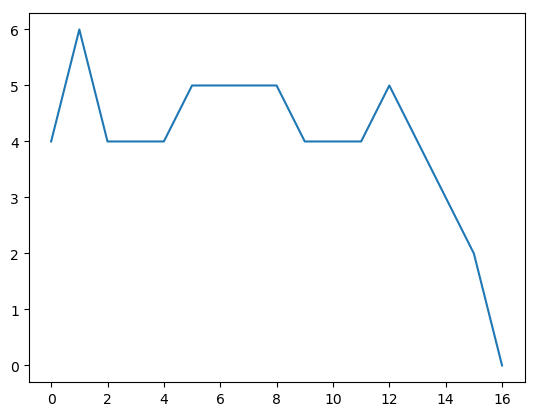

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x149a67a10>

In [418]:
plot(out["q_nnz"])

In [419]:
srand(1)
x = [randn(5*10^3);3*randn(5*10^3)];
s = ones(10^4);
iter = 8;
mult = 4.^(0.6.^(1:iter));
m_range = zeros(iter); ip = zeros(iter); act = zeros(iter);
for i = 1:iter
    L = ash(x,s, mult = mult[i])[3];
    m_range[i] = size(L,2);
    ip[i] = mean(QPsubprob(L, method = "mosek2")["eachQPtime"]);
    act[i] = mean(QPsubprob(L, method = "activeset")["eachQPtime"]);
    println(i)
end

1
2
3
4
5
6
7
8


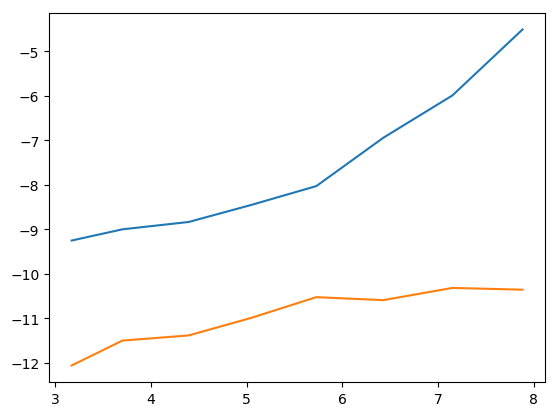

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x167da2850>

In [420]:
plot(log2.(m_range),log2.(ip)); plot(log2.(m_range), log2.(act))